Full Name: Nguyễn Nguyên Khôi

Student ID: 21521009

**Experiment Requirements (for all datasets)**
- Train - test splitting ratio = 7:3.
- Random_state = 'Your Student ID'.
- Experiment with **Gradient Descent** (*max_iter = 200*, *learning_rate (eta)* is set by yourself) and **Normal Equation**.
- Visualize the cost trend (only for Gradient Descent)
- Evaluation Metric: **R2 score**.
- After completing all requirements, click on ‘Runtime’ and choose ‘Restart and run all’.
- If the code is run without any errors (and the results are the same as before re-running), download the .ipybn file and submit. 
Otherwise, check the code carefully.


# PREPARATION

**IMPORT NECESSARY LIBRARIES**

---



In [88]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from google.colab import drive
from sklearn.preprocessing import LabelEncoder

**DEFINE LINEAR REGRESSION IN GRADIENT DESCENT WAY**

---



In [89]:
# Linear Regression class
class LinearRegression_GD:
  def __init__ (self, eta = 0.001, max_iter = 20, random_state = 21521009):
    self.eta = eta
    self.max_iter = max_iter
    self.random_state = random_state
    self.w = None
    self.costs = []

  def predict(self, X):
    return np.dot(X, self.w[1:]) + self.w[0]


  def fit(self, X, y):
   # y = np.reshape(y, (124, 1))
   # print(X.shape)
    rgen = np.random.RandomState(self.random_state)
    self.w = rgen.normal(loc = 0.0, scale = 0.01, size = 1 + X.shape[1])
   # print(self.w.shape)
    self.costs = [ ]
    for n_iters in range (self.max_iter):
      y_pred = self.predict(X)
      diff = y - y_pred
    #  print(y.shape)
      self.w[0] += self.eta * np.sum(diff)
      for j in range(X.shape[1]): # j ← [0, 1, ..., X.shape[1]]
        delta = 0.0
        for i in range(X.shape[0]): # i ← [0, 1, ..., X.shape[0]]
          delta += self.eta * diff[i] * X[i][j]
        self.w[j + 1] += delta
      cost = np.sum(diff ** 2) / 2
      self.costs.append(cost)

**CONNECT TO GOOGLE DRIVE**

---



In [90]:
# google drive mounting
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# Fish Dataset

🐟🐟 **Dataset Information (fish.csv)** 🐟🐟
- Weight: Weight of fish in gram
- Length1: Vertical length in cm
- Length2: Diagonal length in cm
- Length3: Cross length in cm
- Height: Height in cm
- Width: Diagonal width in cm

📚📚 **Problem Requirement** 📚📚

Use all remaining attributes to estimate the **weight** of fish.


**Note**: Try to make the Gradient Descent achieving the comparable performance to the Normal Equation model. ✌✌

**Hint**💡: Apply (suitable) techniques in Data Preprocessing tutorial file.

In [91]:
# read data
df=pd.read_csv('gdrive/My Drive/fish.csv')

**DATA PREPROCESSING**

---



In [92]:
# first 10 rows
df.head(10)

,Weight,Length1,Length2,Length3,Height,Width
0,242.0,23.2,25.4,30.0,11.5200,4.0200
1,290.0,24.0,26.3,31.2,12.4800,4.3056
2,340.0,23.9,26.5,31.1,12.3778,4.6961
3,363.0,26.3,29.0,33.5,12.7300,4.4555
4,430.0,26.5,29.0,34.0,12.4440,5.1340
5,450.0,26.8,29.7,34.7,13.6024,4.9274
6,500.0,26.8,29.7,34.5,14.1795,5.2785
7,390.0,27.6,30.0,35.0,12.6700,4.6900
8,450.0,27.6,30.0,35.1,14.0049,4.8438
9,500.0,28.5,30.7,36.2,14.2266,4.9594


In [93]:
# basic information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Weight   159 non-null    float64
 1   Length1  159 non-null    float64
 2   Length2  159 non-null    float64
 3   Length3  159 non-null    float64
 4   Height   159 non-null    float64
 5   Width    159 non-null    float64
dtypes: float64(6)
memory usage: 7.6 KB


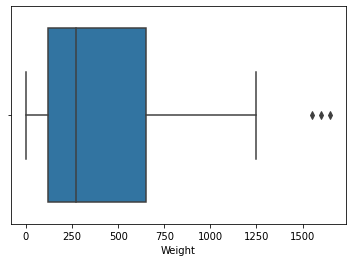

In [94]:
# indentify outliers
sns.boxplot(x=df['Weight'])

In [95]:
dfw = df['Weight']
dfw_Q1 = dfw.quantile(0.25)
dfw_Q3 = dfw.quantile(0.75)
dfw_IQR = dfw_Q3 - dfw_Q1
dfw_lowerend = dfw_Q1 - (1.5 * dfw_IQR)
dfw_upperend = dfw_Q3 + (1.5 * dfw_IQR)

In [96]:
dfw_outliers = dfw[(dfw < dfw_lowerend) | (dfw > dfw_upperend)]
dfw_outliers

142    1600.0
143    1550.0
144    1650.0
Name: Weight, dtype: float64

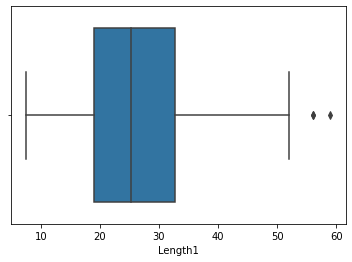

In [97]:
sns.boxplot(x=df['Length1'])

In [98]:
dfl1 = df['Length1']
dfl1_Q1 = dfl1.quantile(0.25)
dfl1_Q3 = dfl1.quantile(0.75)
dfl1_IQR = dfl1_Q3 - dfl1_Q1
dfl1_lowerend = dfl1_Q1 - (1.5 * dfl1_IQR)
dfl1_upperend = dfl1_Q3 + (1.5 * dfl1_IQR)

dfl1_outliers = dfl1[(dfl1 < dfl1_lowerend) | (dfl1 > dfl1_upperend)]
dfl1_outliers

142    56.0
143    56.0
144    59.0
Name: Length1, dtype: float64

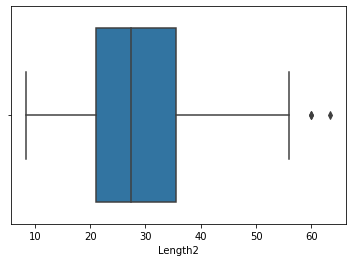

In [99]:
sns.boxplot(x=df['Length2'])

In [100]:
dfl2 = df['Length2']
dfl2_Q1 = dfl2.quantile(0.25)
dfl2_Q3 = dfl2.quantile(0.75)
dfl2_IQR = dfl2_Q3 - dfl2_Q1
dfl2_lowerend = dfl2_Q1 - (1.5 * dfl2_IQR)
dfl2_upperend = dfl2_Q3 + (1.5 * dfl2_IQR)

dfl2_outliers = dfl2[(dfl2 < dfl2_lowerend) | (dfl2 > dfl2_upperend)]
dfl2_outliers

142    60.0
143    60.0
144    63.4
Name: Length2, dtype: float64

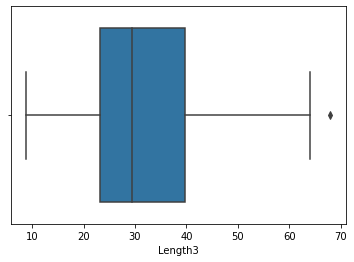

In [101]:
sns.boxplot(x=df['Length3'])

In [102]:
dfl3 = df['Length3']
dfl3_Q1 = dfl3.quantile(0.25)
dfl3_Q3 = dfl3.quantile(0.75)
dfl3_IQR = dfl3_Q3 - dfl3_Q1
dfl3_lowerend = dfl3_Q1 - (1.5 * dfl3_IQR)
dfl3_upperend = dfl3_Q3 + (1.5 * dfl3_IQR)

dfl3_outliers = dfl3[(dfl3 < dfl3_lowerend) | (dfl3 > dfl3_upperend)]
dfl3_outliers

144    68.0
Name: Length3, dtype: float64

**OUTLIERS OF THE DATASET LIE AT ROW 142, 143 AND 144**

In [103]:
df[142:145]

,Weight,Length1,Length2,Length3,Height,Width
142,1600.0,56.0,60.0,64.0,9.600,6.144
143,1550.0,56.0,60.0,64.0,9.600,6.144
144,1650.0,59.0,63.4,68.0,10.812,7.480


In [104]:
# drop outliers
df1 = df.drop([142,143,144])
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Weight,156.0,375.217308,319.546978,0.0000,120.000000,271.0000,612.500000,1250.000
Length1,156.0,25.655769,9.119630,7.5000,19.000000,25.0000,32.125000,52.000
Length2,156.0,27.786538,9.792651,8.4000,21.000000,26.7500,35.000000,56.000
Length3,156.0,30.571154,10.695359,8.8000,23.025000,29.2500,39.425000,59.700
Height,156.0,8.951128,4.324325,1.7284,5.931675,7.6478,12.378550,18.957
Width,156.0,4.375719,1.672188,1.0476,3.369600,4.2433,5.424375,8.142


In [105]:
std_scaler = StandardScaler()
df1 = std_scaler.fit_transform(df1)

In [106]:
X = df1[:,1:]

In [107]:
y = df1[:,0]

In [108]:
y.shape

(156,)

**SPLITTING DATASET**

---



In [109]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21521009)

In [110]:
X_train.shape

(124, 5)

In [111]:
print('How many samples do we have in our test and train datasets?')
print('X_train: ', np.shape(X_train))
print('y_train: ', np.shape(y_train))
print('X_test: ', np.shape(X_test))
print('y_test: ', np.shape(y_test))

How many samples do we have in our test and train datasets?
X_train:  (124, 5)
y_train:  (124,)
X_test:  (32, 5)
y_test:  (32,)


**TRAINING USING NORMAL EQUATION**

---



In [112]:
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [113]:
print('Model intercept: ', reg.intercept_)
print('Model coefficients: ', reg.coef_)

Model intercept:  -0.01890628282474344
Model coefficients:  [ 3.11877446 -1.53359785 -1.32828414  0.52917673  0.2572183 ]


**TRAINING USING GRADIENT DESCENT**

---



In [114]:
reg_GD = LinearRegression_GD(eta = 0.001, max_iter = 200, random_state=21521009)
reg_GD.fit(X_train, y_train)

In [115]:
print(reg_GD.w)

[-0.00584719  0.17363829  0.14441298  0.02955298  0.21276342  0.40825282]


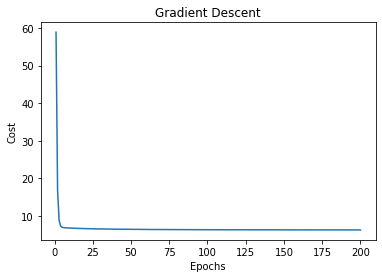

In [116]:
plt.plot(range(1, len(reg_GD.costs) + 1), reg_GD.costs)
plt.xlabel("Epochs")
plt.ylabel("Cost")
plt.title("Gradient Descent")
plt.show()

**COMPARING NORMAL EQUATION TO GRADIENT DESCENT**

---



TRAINING DATASET

In [117]:
# normal equation
y_train_pred1 = reg.predict(X_train)
score1 = r2_score(y_train_pred1, y_train)
score1

0.8936562995163353

In [118]:
# gradient descent
y_train_pred2 = reg_GD.predict(X_train)
score2 = r2_score(y_train_pred2, y_train)
score2

0.879257223405448

In [119]:
# difference in %
print("Difference:",round((score1 - score2), 5) * 100, "%")

Difference: 1.44 %


TESTING DATASET

In [120]:
# normal equation
y_test_pred1 = reg.predict(X_test)
eval1 = r2_score(y_test_pred1, y_test)
eval1

0.8372051599585524

In [121]:
# gradient descent
y_test_pred2 = reg_GD.predict(X_test)
eval2 = r2_score(y_test_pred2, y_test)
eval2

0.8309543699520843

In [122]:
# difference in %
print("Difference:",round((eval1 - eval2), 5) * 100, "%")

Difference: 0.625 %


# Insurance Dataset

💰💰 **Dataset Information (insurance.csv)** 💰💰
- age: Age of primary beneficiary
- sex: Insurance contractor gender, female / male
- bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to
- children: Number of children covered by health insurance / Number of dependents
- smoker: Smoker / Non-smoker
- region: The beneficiary's residential area in the US, northeast, southeast, southwest, northwest
- charges: Individual medical costs billed by health insurance

📚📚 **Problem Requirement** 📚📚

Use all remaining attributes to estimate the individual medical costs billed by health insurance ('**charges**')


**Note**: Try to make the Gradient Descent achieving the comparable performance to the Normal Equation model. ✌✌

**Hint**💡: Apply (suitable) techniques in the Data Preprocessing tutorial file.

In [123]:
# read data
insurance=pd.read_csv('gdrive/My Drive/insurance.csv')

**DATA PREPROCESSING**

---



In [124]:
label_encoder = LabelEncoder()

In [125]:
insurance["sex"] = label_encoder.fit_transform(insurance["sex"])
insurance["smoker"] = label_encoder.fit_transform(insurance["smoker"])
insurance["region"] = label_encoder.fit_transform(insurance["region"])

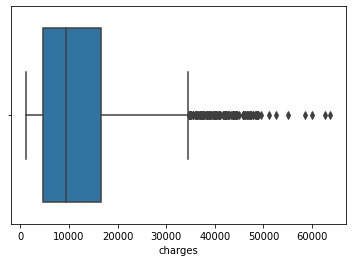

In [126]:
# indentify outliers
sns.boxplot(x=insurance["charges"])

In [127]:
dfc = insurance["charges"]
dfc_Q1 = dfc.quantile(0.25)
dfc_Q3 = dfc.quantile(0.75)
dfc_IQR = dfc_Q3 - dfc_Q1
dfc_lowerend = dfc_Q1 - (1.5 * dfc_IQR)
dfc_upperend = dfc_Q3 + (1.5 * dfc_IQR)

dfc_outliers = dfc[(dfc < dfc_lowerend) | (dfc > dfc_upperend)]
dfc_outliers

14      39611.75770
19      36837.46700
23      37701.87680
29      38711.00000
30      35585.57600
           ...     
1300    62592.87309
1301    46718.16325
1303    37829.72420
1313    36397.57600
1323    43896.37630
Name: charges, Length: 139, dtype: float64

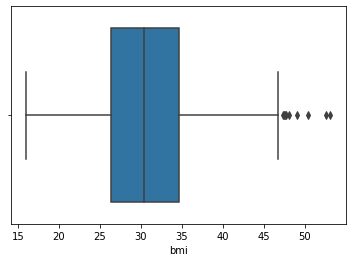

In [128]:
sns.boxplot(x=insurance["bmi"])

In [129]:
dfbmi = insurance["bmi"]
dfbmi_Q1 = dfbmi.quantile(0.25)
dfbmi_Q3 = dfbmi.quantile(0.75)
dfbmi_IQR = dfbmi_Q3 - dfbmi_Q1
dfbmi_lowerend = dfbmi_Q1 - (1.5 * dfbmi_IQR)
dfbmi_upperend = dfbmi_Q3 + (1.5 * dfbmi_IQR)

dfbmi_outliers = dfbmi[(dfbmi < dfbmi_lowerend) | (dfbmi > dfbmi_upperend)]
dfbmi_outliers

116     49.06
286     48.07
401     47.52
543     47.41
847     50.38
860     47.60
1047    52.58
1088    47.74
1317    53.13
Name: bmi, dtype: float64

In [130]:
outliers = []
for i in dfc_outliers.keys():
  outliers.append(i)
b = [116, 286, 401, 847, 1088, 1317]
for i in b:
  outliers.append(i)
insurance.drop(outliers)

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


In [131]:
std_scaler = StandardScaler()
insurance = std_scaler.fit_transform(insurance)

In [132]:
X = insurance[:,0:6]
y = insurance[:,6]

In [133]:
insurance.shape

(1338, 7)

**SPLITTING THE DATASET**

---



In [134]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21521009)

In [135]:
print('How many samples do we have in our test and train datasets?')
print('X_train: ', np.shape(X_train))
print('y_train: ', np.shape(y_train))
print('X_test: ', np.shape(X_test))
print('y_test: ', np.shape(y_test))

How many samples do we have in our test and train datasets?
X_train:  (936, 6)
y_train:  (936,)
X_test:  (402, 6)
y_test:  (402,)


**TRAINING USING NORMAL EQUATION**

---



In [136]:
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [137]:
print('Model intercept: ', reg.intercept_)
print('Model coefficients: ', reg.coef_)

Model intercept:  0.0002771514240666943
Model coefficients:  [ 3.06395912e-01  5.85628857e-04  1.46920085e-01  5.10034454e-02
  7.75666156e-01 -9.37049013e-03]


**TRAINING USING GRADIENT DESCENT**

---



In [138]:
reg_GD = LinearRegression_GD(eta = 0.001, max_iter = 200, random_state=21521009)
reg_GD.fit(X_train, y_train)

In [139]:
print(reg_GD.w)

[ 2.77151424e-04  3.06395912e-01  5.85628857e-04  1.46920085e-01
  5.10034454e-02  7.75666156e-01 -9.37049013e-03]


**COMPARING NORMAL EQUATION TO GRADIENT DESCENT**

---



TRAINING DATASET

In [140]:
# normal equation
y_train_pred1 = reg.predict(X_train)
score1 = r2_score(y_train_pred1, y_train)
score1

0.6486059666939443

In [141]:
# gradient descent
y_train_pred2 = reg_GD.predict(X_train)
score2 = r2_score(y_train_pred2, y_train)
score2

0.6486059666939439

In [142]:
# difference in %
print("Difference:", round((score1 - score2), 5) * 100, "%")

Difference: 0.0 %


TESTING DATASET

In [143]:
# normal equation
y_test_pred1 = reg.predict(X_test)
eval1 = r2_score(y_test_pred1, y_test)
eval1

0.66148008530092

In [144]:
# gradient descent
y_test_pred2 = reg_GD.predict(X_test)
eval2 = r2_score(y_test_pred2, y_test)
eval2

0.6614800853009195

In [145]:
# difference in %
print("Difference:", round((eval1 - eval2), 5) * 100, "%")

Difference: 0.0 %


# Tesla Stock Dataset

📈📈 **Dataset Information (tesla_stock.csv)** 📈📈
- Open: The opening price of the stock
- High: The high price of that day
- Low: The low price of that day
- Close: The closed price of that day
- Volume: The amount of stocks traded during that day

📚📚 **Problem Requirement** 📚📚

Use all remaining attributes to predict the closing price of tesla stock ('**Close**')


**Note**: Try to make the Gradient Descent achieving the comparable performance to the Normal Equation model. ✌✌

**Hint**💡: Apply (suitable) techniques in the Data Preprocessing tutorial file.

In [146]:
# read data
df=pd.read_csv('gdrive/My Drive/tesla_stock.csv')

**DATA PREPROCESSING**

---



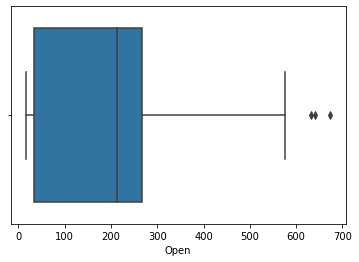

In [147]:
# indentify outliers
sns.boxplot(x=df["Open"])

In [148]:
dfo = df["Open"]
dfo_Q1 = dfo.quantile(0.25)
dfo_Q3 = dfo.quantile(0.75)
dfo_IQR = dfo_Q3 - dfo_Q1
dfo_lowerend = dfo_Q1 - (1.5 * dfo_IQR)
dfo_upperend = dfo_Q3 + (1.5 * dfo_IQR)

In [149]:
dfo_outliers = dfo[(dfo < dfo_lowerend) | (dfo > dfo_upperend)]
dfo_outliers

2413    632.419983
2414    640.000000
2415    673.690002
Name: Open, dtype: float64

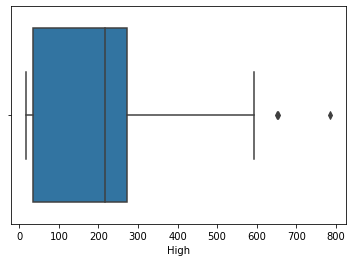

In [150]:
# indentify outliers
sns.boxplot(x=df["High"])

In [151]:
dfh = df["High"]
dfh_Q1 = dfh.quantile(0.25)
dfh_Q3 = dfh.quantile(0.75)
dfh_IQR = dfh_Q3 - dfh_Q1
dfh_lowerend = dfh_Q1 - (1.5 * dfh_IQR)
dfh_upperend = dfh_Q3 + (1.5 * dfh_IQR)

In [152]:
dfh_outliers = dfh[(dfh < dfh_lowerend) | (dfh > dfh_upperend)]
dfh_outliers

2413    650.880005
2414    653.000000
2415    786.140015
Name: High, dtype: float64

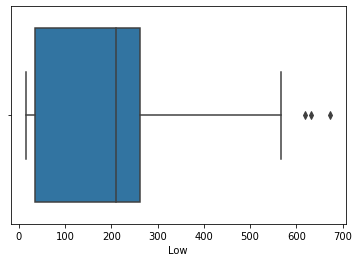

In [153]:
# indentify outliers
sns.boxplot(x=df["Low"])

In [154]:
dfl = df["Low"]
dfl_Q1 = dfl.quantile(0.25)
dfl_Q3 = dfl.quantile(0.75)
dfl_IQR = dfl_Q3 - dfl_Q1
dfl_lowerend = dfl_Q1 - (1.5 * dfl_IQR)
dfl_upperend = dfl_Q3 + (1.5 * dfl_IQR)

In [155]:
dfl_outliers = dfl[(dfl < dfl_lowerend) | (dfl > dfl_upperend)]
dfl_outliers

2413    618.00000
2414    632.52002
2415    673.52002
Name: Low, dtype: float64

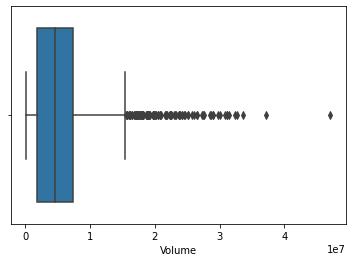

In [156]:
# indentify outliers
sns.boxplot(x=df["Volume"])

In [157]:
dfv = df["Volume"]
dfv_Q1 = dfv.quantile(0.25)
dfv_Q3 = dfv.quantile(0.75)
dfv_IQR = dfv_Q3 - dfv_Q1
dfv_lowerend = dfv_Q1 - (1.5 * dfv_IQR)
dfv_upperend = dfv_Q3 + (1.5 * dfv_IQR)

In [158]:
dfv_outliers = dfv[(dfv < dfv_lowerend) | (dfv > dfv_upperend)]
dfv_outliers

0       18766300
1       17187100
720     28605000
721     25082600
722     22416900
          ...   
2408    19651000
2412    17801500
2413    29005700
2414    15719300
2415    47065000
Name: Volume, Length: 110, dtype: int64

In [159]:
outliers = [i for i in dfv_outliers.keys()]
df = df.drop(outliers)

In [160]:
std_scaler = StandardScaler()
df = std_scaler.fit_transform(df)

In [161]:
X = np.delete(df, 3, axis = 1)
y = df[:, 3]

In [162]:
y.shape

(2306,)

**SPLITTING THE DATASET**

---



In [163]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21521009)

In [164]:
print('How many samples do we have in our test and train datasets?')
print('X_train: ', np.shape(X_train))
print('y_train: ', np.shape(y_train))
print('X_test: ', np.shape(X_test))
print('y_test: ', np.shape(y_test))

How many samples do we have in our test and train datasets?
X_train:  (1614, 4)
y_train:  (1614,)
X_test:  (692, 4)
y_test:  (692,)


**TRAINING USING NORMAL EQUATION**

---



In [165]:
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [166]:
print('Model intercept: ', reg.intercept_)
print('Model coefficients: ', reg.coef_)

Model intercept:  -5.2829397310156026e-05
Model coefficients:  [-6.05938371e-01  8.43409398e-01  7.61808525e-01  6.00921021e-04]


**TRAINING USING GRADIENT DESCENT**

---



In [167]:
reg_GD = LinearRegression_GD(eta = 0.0001, max_iter = 200, random_state=21521009)
reg_GD.fit(X_train, y_train)

In [168]:
print(reg_GD.w)

[3.62926151e-05 3.12188591e-01 3.39779100e-01 3.46835727e-01
 1.39161050e-03]


**COMPARING NORMAL EQUATION TO GRADIENT DESCENT**

---



TRAINING DATASET

---



In [169]:
# normal equation
y_train_pred1 = reg.predict(X_train)
score1 = r2_score(y_train_pred1, y_train)
score1

0.9997345058323925

In [170]:
# gradient descent
y_train_pred2 = reg_GD.predict(X_train)
score2 = r2_score(y_train, y_train_pred2)
score2

0.999329229078981

In [171]:
# difference in %
print("Difference: ", round((score1 - score2) / score1, 5) * 100, "%")

Difference:  0.041 %


TESTING DATASET

---



In [172]:
# normal equation
y_test_pred1 = reg.predict(X_test)
eval1 = r2_score(y_test_pred1, y_test)
eval1

0.9997278150605682

In [173]:
# gradient descent
y_test_pred2 = reg_GD.predict(X_test)
eval2 = r2_score(y_test_pred2, y_test)
eval2

0.9992503025553089

In [174]:
# difference in %
print("Difference: ", round((eval1 - eval2) / score1, 5) * 100, "%")

Difference:  0.048 %
